# Practical 5: Putting it all together
<hr>
By now, you have seen several Python demos and progressed your coding abilities substantially. Therefore, it is safe and suitable for the fifth practical to focus more on exercises. This is what we will do. Past lecture sessions introduced relevant machine learning concepts, including tree-based models, neural networks, and the fundamental problem of overfitting. A lot of content to revisit. Let's go!

## Preliminaries
First of all, as usual, we import a couple of libraries. Also, we reproduce codes from previous sessions to prepare for subsequent tasks. In a nutshell, the following codes
- load the *California Housing Data Set*,
- partition the data set into a training (70%) and test set (30%)
- fit and assess a linear regression model on the training and test set, respectively

For the latter part, we introduce a custom function called `my_model_performance()` that takes care of the evaluation. Re-using this function will save you some time in Exercise 1. So take a little time to check out the function's code and how to use it. 

In [13]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# SKlearn imports (all functions have been introduced in previous sessions)
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

#--------------------------------------------------------
# Loading the California Housing data set
#--------------------------------------------------------
calh = fetch_california_housing(as_frame=True)  # get the data as a Pandas dataframe
# separate the data into feature matrix X and target variable y
X = calh.data
y = calh.target
print('Loaded California Housing data set with dimension (rows x columns) {} x {}'.format(*X.shape))

#--------------------------------------------------------
# Data organization
#--------------------------------------------------------
test_frac = 0.3
Xtr, Xts, ytr, yts = train_test_split(X, y, test_size=test_frac)
print('{:.0f}% test set has dimension (rows x columns) {} x {}'.format(test_frac*100, *Xts.shape))

#--------------------------------------------------------
# Training (aka fitting) a linear regression model
#--------------------------------------------------------
lreg = LinearRegression().fit(Xtr, ytr)
print('Estimated coefficients of linear regression model')
df_print = pd.DataFrame(data=lreg.coef_, index=X.columns, columns=['Coefficient'])
print(df_print)

#--------------------------------------------------------
# Predict the test set and compute prediction performance
#--------------------------------------------------------
yhat_lreg = lreg.predict(Xts)

def my_model_performance(yhat, ytrue):
    ''' Helper function to assess the accuracy
        of forecasts in terms of MSE and MAE
        and format the results for printing.

        Inputs: yhat         (float) array with predictions
                ytrue        (float) array with observed outcomes

        Output: String; depicting model performance
    '''

    result = 'MSE={:.3f}, MAE={:.3f}'.format(
        mean_squared_error(y_true=ytrue, y_pred=yhat), 
        mean_absolute_error(y_true=ytrue, y_pred=yhat)
    )
    
    return result

print('Performance of linear regression model:\t', 
      my_model_performance(yhat_lreg, ytrue=yts)
     )

Loaded California Housing data set with dimension (rows x columns) 20640 x 8
30% test set has dimension (rows x columns) 6192 x 8
Estimated coefficients of linear regression model
            Coefficient
MedInc         0.432836
HouseAge       0.009201
AveRooms      -0.098021
AveBedrms      0.590579
Population    -0.000004
AveOccup      -0.003198
Latitude      -0.416259
Longitude     -0.428709
Performance of linear regression model:	 MSE=0.548, MAE=0.546


## Exercise 1: Warm-Up
Since the last coding sessions, we have heard about *Decision Trees* and *Neural Networks* but never really used them. Hence, this is what we do next. Here is your task: 

You can find the functionality to use the above learners in the modules `sklearn.neural_network` and  `sklearn.tree`. The corresponding classes are called, respectively, `MLPRegressor` and `DecisionTreeRegressor`. This information should suffice to train and assess your first neural network and tree model. More specifically, use the training data `Xtr` and `ytr`, which we created in the *Preliminaries* for training one network and one tree. Next, compute test set predictions and assess the models in the same way as illustrated above for linear regression using our custom function `my_model_performance()`. 

In [14]:
# Your solution to Exercise 1

# ------------------------------------------------------------
# Train and evaluate a Decision Tree and a Neural Network
# using (Xtr, ytr) and assess performance on test set (Xts, yts)
# with helper function my_model_performance().
# ------------------------------------------------------------
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Decision Tree Regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(Xtr, ytr)

# Neural Network (MLP) inside a pipeline with scaling
nn = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu',
                          random_state=42, max_iter=300))
])
nn.fit(Xtr, ytr)

# Predictions
yhat_tree_ts = tree.predict(Xts)
yhat_tree_tr = tree.predict(Xtr)
yhat_nn_ts = nn.predict(Xts)
yhat_nn_tr = nn.predict(Xtr)
yhat_lreg_ts = lreg.predict(Xts)
yhat_lreg_tr = lreg.predict(Xtr)

print("Linear Regression (test):\t", my_model_performance(yhat_lreg_ts, ytrue=yts))
print("Linear Regression (train):\t", my_model_performance(yhat_lreg_tr, ytrue=ytr))
print("Decision Tree (test):\t\t", my_model_performance(yhat_tree_ts, ytrue=yts))
print("Decision Tree (train):\t\t", my_model_performance(yhat_tree_tr, ytrue=ytr))
print("Neural Network (test):\t", my_model_performance(yhat_nn_ts, ytrue=yts))
print("Neural Network (train):\t", my_model_performance(yhat_nn_tr, ytrue=ytr))

# Summary DataFrame
perf_df = pd.DataFrame([
    ("Linear Regression (test)", my_model_performance(yhat_lreg_ts, ytrue=yts)),
    ("Linear Regression (train)", my_model_performance(yhat_lreg_tr, ytrue=ytr)),
    ("Decision Tree (test)", my_model_performance(yhat_tree_ts, ytrue=yts)),
    ("Decision Tree (train)", my_model_performance(yhat_tree_tr, ytrue=ytr)),
    ("Neural Network (test)", my_model_performance(yhat_nn_ts, ytrue=yts)),
    ("Neural Network (train)", my_model_performance(yhat_nn_tr, ytrue=ytr)),
], columns=["Model", "Performance (MSE, MAE)"])
perf_df.head(6)

Linear Regression (test):	 MSE=0.548, MAE=0.546
Linear Regression (train):	 MSE=0.514, MAE=0.524
Decision Tree (test):		 MSE=0.539, MAE=0.472
Decision Tree (train):		 MSE=0.000, MAE=0.000
Neural Network (test):	 MSE=0.278, MAE=0.360
Neural Network (train):	 MSE=0.217, MAE=0.325


,Model,"Performance (MSE, MAE)"
0,Linear Regression (test),"MSE=0.548, MAE=0.546"
1,Linear Regression (train),"MSE=0.514, MAE=0.524"
2,Decision Tree (test),"MSE=0.539, MAE=0.472"
3,Decision Tree (train),"MSE=0.000, MAE=0.000"
4,Neural Network (test),"MSE=0.278, MAE=0.360"
5,Neural Network (train),"MSE=0.217, MAE=0.325"


Take a little time to examine model performance. Which model performs the best on this data set, the decision tree or the neural network? And do not forget to also compare to linear regression. There is no guarantee that more advanced learning algorithms give better results.

## Exercise 2: Overfitting
How did the lecture introduce overfitting? As the **fundamental problem** in machine learning. If that does not sound important, right? In theory, the decision tree and neural network model, which you just created should both be vulnerable to overfitting. However, we recommend you use the decision tree for Exercise #2 because it is faster to train. Here is your task:

Overfitting is a problem of complex machine learning models. The complexity of a decision tree depends, amongst others, on its depth. Explore the documentation of `DecisionTreeRegressor` and familiarize yourself with the argument `max_depth`. As the name suggests, this argument allows you to create decision tree models with different depths (i.e., number of splits). Train and assess multiple trees of increasing depth. Start with a depth of one and increase it incrementally. For each candidate depth, grow a tree of that depth and compute the corresponding test set error. Also compute the training set error and store these quantities. Then, create a plot that depicts how both errors, training and test error, develop when the depth of the tree increases. Based on the lecture, you should have a good idea of how the resulting plot should look like... 

<img src="https://raw.githubusercontent.com/stefanlessmann/ESMT_IML/main/resources/bias_var_overfitting.png" width="1280" height="720" alt="Bias, variance, and the fundamental problem of overfitting">

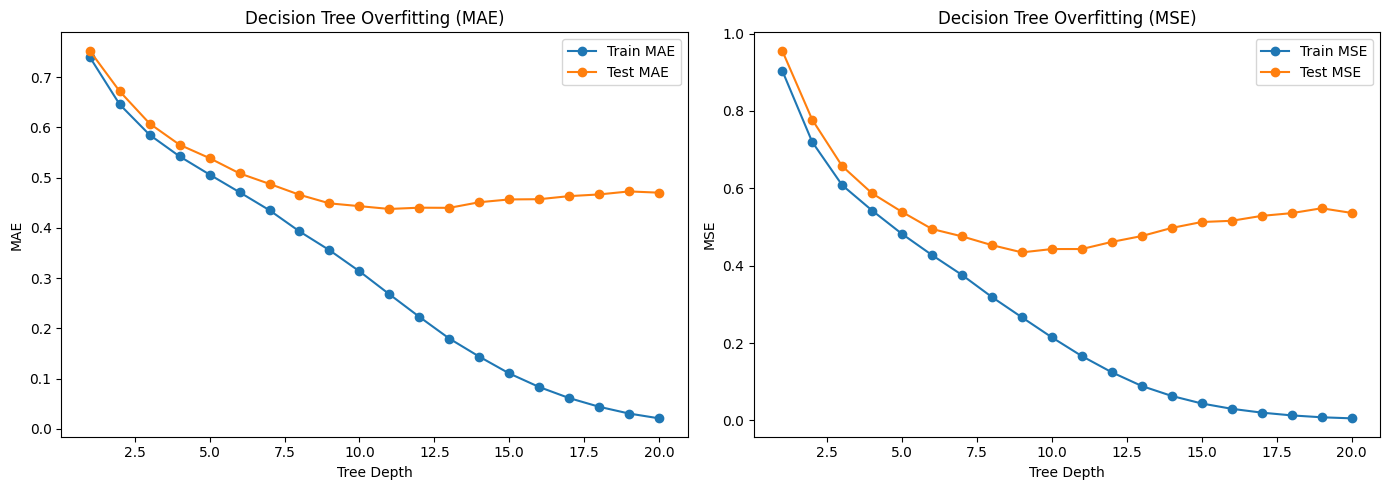

Best depth by Test MAE: 11 (Test MAE=0.438)


In [18]:
# Your solution to Exercise 2
# Overfitting study: vary tree depth and record train/test errors
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

depth_values = list(range(1, 21))  # depths 1..20
train_mae = []
test_mae = []
train_mse = []
test_mse = []

for d in depth_values:
    tree_d = DecisionTreeRegressor(max_depth=d, random_state=42)
    tree_d.fit(Xtr, ytr)
    # predictions
    ytr_pred = tree_d.predict(Xtr)
    yts_pred = tree_d.predict(Xts)
    # errors
    train_mae.append(mean_absolute_error(ytr, ytr_pred))
    test_mae.append(mean_absolute_error(yts, yts_pred))
    train_mse.append(mean_squared_error(ytr, ytr_pred))
    test_mse.append(mean_squared_error(yts, yts_pred))

# Plot MAE vs depth
fig, ax = plt.subplots(1, 2, figsize=(14,5))
ax[0].plot(depth_values, train_mae, marker='o', label='Train MAE')
ax[0].plot(depth_values, test_mae, marker='o', label='Test MAE')
ax[0].set_xlabel('Tree Depth')
ax[0].set_ylabel('MAE')
ax[0].set_title('Decision Tree Overfitting (MAE)')
ax[0].legend()

# Plot MSE vs depth
ax[1].plot(depth_values, train_mse, marker='o', label='Train MSE')
ax[1].plot(depth_values, test_mse, marker='o', label='Test MSE')
ax[1].set_xlabel('Tree Depth')
ax[1].set_ylabel('MSE')
ax[1].set_title('Decision Tree Overfitting (MSE)')
ax[1].legend()
plt.tight_layout()
plt.show()

# Identify depth with minimum test MAE
best_depth = depth_values[int(np.argmin(test_mae))]
print(f'Best depth by Test MAE: {best_depth} (Test MAE={min(test_mae):.3f})')

At this point, you should look at an enticing visualization of the **overfitting problem**. The deeper the decision tree the more complex the model. More splits imply that the tree can model more complicated relationships between the features and the target. However, this ability can result in the tree fitting the *training* data too well. Once the tree starts to capture idiosyncratic noise during training and transfers this noise to its predictions, the error on the test set should increase. Therefore, your visualization highlights two important points. It provides you with empirical proof that overfitting is a real problem that you must be aware of. Further, and more practically, the plot can also suggest a suitable tree depth (i.e., meta-parameter setting) for this data set. The point where the test set error is the lowest marks the optimal depth for the tree for this data set. 

## Exercise 3: Benchmarking
Given that many different learning algorithms with different merits and demerits exist, and given that none of these should be considered generally better than others, a common scenario in machine learning is that one aims to find the most suitable approach for a given data set. Well, we are given a data set, right? So let's try to mimic this *benchmarking* scenario. To make it more interesting, we can further extend the set of learning algorithms we consider. The lecture has, although only briefly, mentioned two common tree-based ensemble algorithms, Random Forest and Gradient Boosting. You can easily access those via `sklearn`, which refers to them as `RandomForestRegressor` and `GradientBoostingRegressor`. These classes are available in the module `sklearn.ensemble`. 

For this exercise, you do not need to write much new code. Virtually all codes that you need have already appeared in one way or the other in previous parts of the notebook. Therefore, this exercise provides a great opportunity to further advance your coding skills. The idea of a benchmark is that you assess multiple learning algorithms. Each one undergoes a standardized treatment: train, compute predictions, compute performance, store results, etc. Surely there is a way to write the code for benchmarking several alternative learning algorithms in a suitable way without too much copy and pasting ;)

Here is your task:<be>
Implement a benchmarking experiment in which you assess the test set performance the following learning algorithms:
- Linear Regression
- Decision Tree
- Random Forest
- XGB
- Neural Network

Find out which one works best for the California Housing data set. To that end, plot the test set MAE of each model using a bar chart.

                    Model  Test MAE
0           Random Forest  0.342011
1          Neural Network  0.360395
2  XGB (GradientBoosting)  0.378845
3           Decision Tree  0.471577
4       Linear Regression  0.545592


/var/folders/lz/bn18_nv14nqff705lj069l5w0000gp/T/ipykernel_43898/589407119.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=res_df, x="Model", y="Test MAE", palette="viridis")


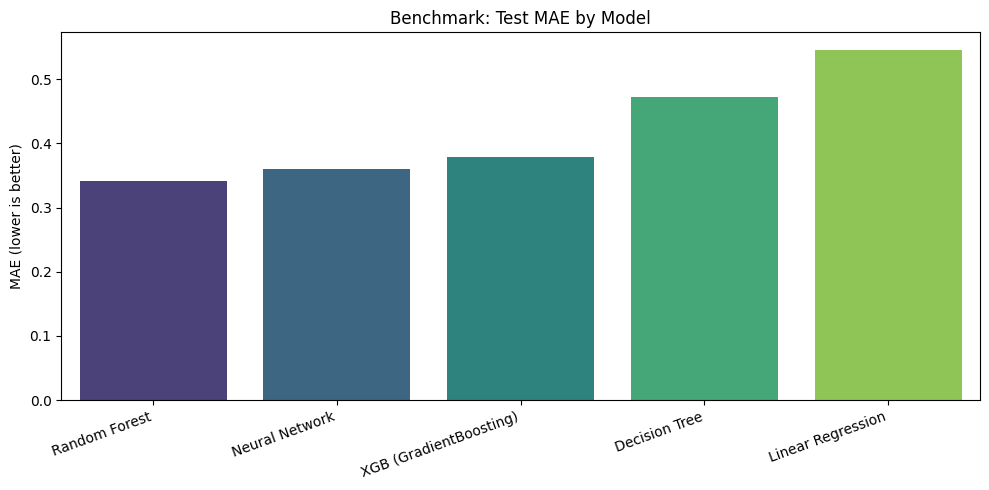

,Model,Test MAE
0,Random Forest,0.342011
1,Neural Network,0.360395
2,XGB (GradientBoosting),0.378845
3,Decision Tree,0.471577
4,Linear Regression,0.545592


In [19]:
# Your solution to Exercise 3

# Benchmark several learners on the California Housing data
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

models = {
    "Linear Regression": lreg,
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "XGB (GradientBoosting)": GradientBoostingRegressor(random_state=42),
    "Neural Network": Pipeline([
        ("scaler", StandardScaler()),
        ("mlp", MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu',
                              random_state=42, max_iter=300))
    ])
}

results = []
for name, model in models.items():
    # Refit linear regression too to ensure fair comparison on current split
    if name == "Linear Regression":
        model = LinearRegression().fit(Xtr, ytr)
    else:
        model.fit(Xtr, ytr)
    y_pred = model.predict(Xts)
    mae = mean_absolute_error(yts, y_pred)
    results.append((name, mae))

# Create DataFrame of results
res_df = pd.DataFrame(results, columns=["Model", "Test MAE"]).sort_values("Test MAE", ascending=True).reset_index(drop=True)
print(res_df)

# Plot bar chart
plt.figure(figsize=(10,5))
sns.barplot(data=res_df, x="Model", y="Test MAE", palette="viridis")
plt.title("Benchmark: Test MAE by Model")
plt.ylabel("MAE (lower is better)")
plt.xlabel("")
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()

res_df

## Exercise 4 (Extra): Hyperparameter tuning
Solving Exercise 3 is a major achievement. Several academic papers have been published on the basis of such benchmarks; so you may be proud to have made it up to this point!

In this additional exercise, we revisit some of the learning algorithms from the previous comparison and check whether we gave them fair treatment. More specifically, advanced learning algorithms like the neural network or gradient boosting exhibit several hyperparameters. For example, the number of boosting iterations is a hyperparameter in gradient boosting. Likewise, the architecture of the neural network needs to be determined by the data scientist. The fact that we did not specify any architecture above or did not specify the number of boosting iterations implies that all hyperparameters were set to default values. This approach is not appropriate. One should tune the hyperparameters of an algorithm to adjust it to a given data set. The `sklearn` library offers functionality for this task in the module `sklearn.model_selection`. This exercise is to familiarize yourself with some of the corresponding options for hyperparameter tuning.

Here is your task:
- Import the the function `GridSearchCV` from the module `sklearn.model_selection` and study its documentation.
- Consider the gradient boosting regressor.
    - Create a dictionary for tuning three of its hyperparameters, the number of base model trees (`n_estimators`), the maximum depth of individual decision trees (`max_depth`), and a third hyperparameter called the learning rate (`learning_rate`).
    - The following code snipped illustrates the structure of such dictionaries. We use the name of the hyperparameters (as shown above) as keys and set the corresponding values equal to lists of candidate settings for the hyperparameter. You can simply copy and paste the code into your solution.
- Call the `GridSearchCV` methods with the following specification:
    - Set the argument `param_grid` equal to your dictionary of candidate hyperparameter settings
    - Set the argument `estimator` equal to `GradientBoostingRegressor()`
    - Set the argument `cv` equal to 3
    - Set the argument `verbose` equal to 2
    - Make sure to store the result of the function by writing something like `searcher = GridSearchCV(....`
- Start the search for optimal hyperparameters by calling the well-known `fit()` function for the GridSearchCV object. For example, continuing the previous demo, your code could look like this: `searcher.fit()`.
- Note that running the `fit()` function may take a while. Once completed, inspect the result and determine which hyperparameters gave the best gradient boosting model, that is, delivered the lowest forecasting error.
- Compute test set predictions and their MAE using the best hyperparameter values. 
- Did hyperparameter tuning improve gradient boosting? Is the tuned model competitive to the learners of the Exercise 3 benchmark? 

**Demo of how to specify a search grid for hyperparameter tuning:** 
```
hyperparameter = {
    'n_estimators': [25, 50, 100],
    'max_depth': [2, 3, 5]
    'learning_rate' : [0.1, 0.01]
}
```

In [20]:
# Your solution to Exercise 4

# Hyperparameter tuning for Gradient Boosting using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Define search grid (demo values from instructions)
param_grid = {
    'n_estimators': [25, 50, 100],
    'max_depth': [2, 3, 5],
    'learning_rate': [0.1, 0.01]
}

# Set up GridSearchCV
searcher = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=42),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # MAE as target metric (negated in sklearn)
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Run search (may take a bit)
searcher.fit(Xtr, ytr)

print('\nBest Parameters:', searcher.best_params_)
print('Best CV MAE: {:.3f}'.format(-searcher.best_score_))  # negate back to MAE

# Evaluate best model on test set
best_model = searcher.best_estimator_
yts_pred_best = best_model.predict(Xts)
test_mae_best = mean_absolute_error(yts, yts_pred_best)
print('Test MAE (best tuned GB): {:.3f}'.format(test_mae_best))

# Compare to default GradientBoostingRegressor
default_gb = GradientBoostingRegressor(random_state=42).fit(Xtr, ytr)
yts_pred_default = default_gb.predict(Xts)
test_mae_default = mean_absolute_error(yts, yts_pred_default)
print('Test MAE (default GB): {:.3f}'.format(test_mae_default))

# Small summary DataFrame
tune_df = pd.DataFrame([
    ('Tuned GB', test_mae_best),
    ('Default GB', test_mae_default)
], columns=['Model', 'Test MAE']).sort_values('Test MAE')
tune_df

Fitting 3 folds for each of 18 candidates, totalling 54 fits
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=25; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=25; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=25; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=25; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=25; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=25; total time=   0.4s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=25; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time=   0.7s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time=   0.7s
[CV] END ....learning_rate=0.1, max_depth=2, n_estimators=50; total time=   0.7s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=25; total time=   0.5s
[CV] END ....learning_rate=0.1, max_depth=2, n_e

,Model,Test MAE
0,Tuned GB,0.337020
1,Default GB,0.378845


I assume your result shows that tuning has improved gradient boosting substantially and that the tuned boosting model outperforms all competitors with quite some margin. At least, this is the result I obtained when solving the tasks and running the notebook. After all, there is a reason for many data scientists calling gradient boosting *the best off the shelf learner*. Next time you seek a powerful learning algorithm for a regression or classification problem involving tabular data, pick gradient boosting, tune its hyperparameter to your data, this should give you a reasonably good idea of how well the target variable in your data can be predicted based on the available features. 


# Excellent Work! This was a challenging notebook, and you made it all through!